In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import scipy.stats as stats
import pprint
import json
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [212]:
df = pd.read_csv('marketing.csv')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2010 non-null   int64  
 1   Age                  2010 non-null   int64  
 2   Gender               2010 non-null   object 
 3   Income               1931 non-null   float64
 4   CampaignChannel      1856 non-null   object 
 5   CampaignType         2010 non-null   object 
 6   AdSpend              2010 non-null   object 
 7   ClickThroughRate     2010 non-null   float64
 8   ConversionRate       2010 non-null   float64
 9   WebsiteVisits        2010 non-null   int64  
 10  PagesPerVisit        2010 non-null   float64
 11  TimeOnSite           1931 non-null   float64
 12  SocialShares         2010 non-null   int64  
 13  EmailOpens           2010 non-null   int64  
 14  EmailClicks          2010 non-null   int64  
 15  PreviousPurchases    2010 non-null   i

<H1>Univariate

In [277]:
#Add functions for Univariate analysis
def describe_numerical_col(df, col_name):
    info = df[[col_name]].describe().to_dict()[col_name]
    info['shapiro'] = stats.shapiro(df[col_name])[1]
    info['normal'] = info['shapiro'] < 0.05
    info['missing'] = df[col_name].isna().sum()
    info['skew'] = stats.skew(df[col_name])
    info['type'] = ('slight ' if info['normal'] else '') + ('right(positive)' if info['skew'] > 0 else 'left(negative)') + '-skew'

    fig = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios':(.85, .15)})
    ax1 = plt.subplot(211)
    sns.histplot(df[col_name], kde=True)
    ax2 = plt.subplot(212)
    sns.boxplot(df[col_name], orient='h')
    ax1.set_title(col_name)
    ax1.set_xticklabels([])
    ax2.set_yticklabels([])
    ax1.set_xlabel('')
    ax1.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

    print('='*18 + ' ' +col_name + ' ' + '='*18)
    print(json.dumps(info, indent=3, sort_keys=False, default=str)) # using json.dumps for prettier printing
    print('='*40)
    
def categorize_numerical_col(col_name, bins, bins_name):
    new_col = f'{col_name}_categorized'
    df[new_col] = pd.cut(df[col_name], bins=bins, labels=bins_name)

def describe_categorical_col(df, col_name):
    counts = df[col_name].value_counts().sort_values()
    total = len(df[col_name])
    percents = (counts / total * 100).round(2)

    plt.figure(figsize=(10,6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel('')
    plt.show()


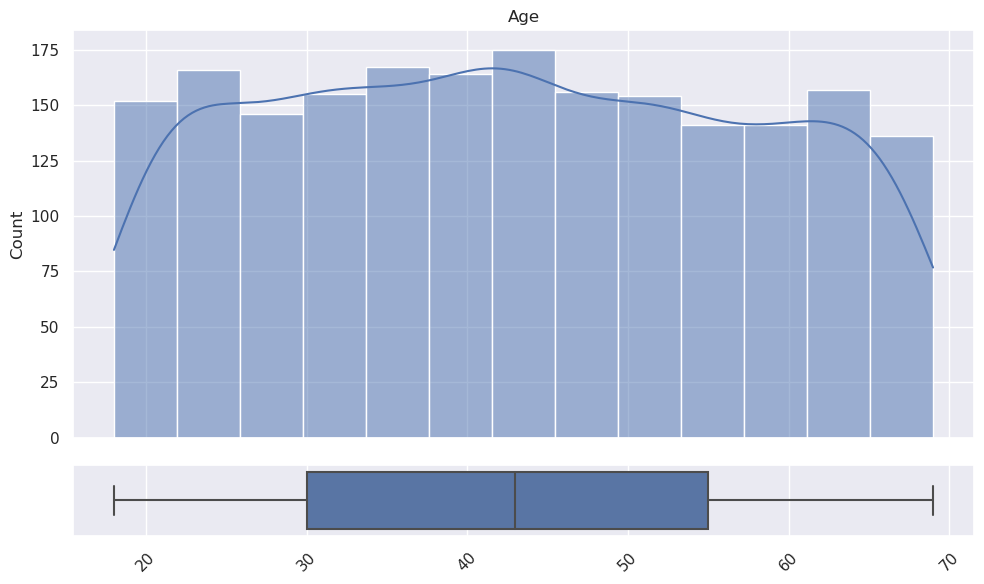

================== Age ==================
{
   "count": 2010.0,
   "mean": 43.01044776119403,
   "std": 14.740002907489549,
   "min": 18.0,
   "25%": 30.0,
   "50%": 43.0,
   "75%": 55.0,
   "max": 69.0,
   "shapiro": 9.120994788956956e-24,
   "normal": "True",
   "missing": "0",
   "skew": 0.04477544203243504,
   "type": "slight right(positive)-skew"
}


In [278]:
describe_numerical_col(df, 'Age')

In [279]:
bins=[18, 30, 45, 60, 70]
bin_labels = ['Young', 'Adult', 'Middle-Aged', 'Old']
categorize_numerical_col('Age', bins=bins, bins_name=bin_labels)


In [280]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Age_categorized
0,13300,36,Female,47648.0,Email,Consideration,893.7554921892273,0.132078,0.198063,38,...,11.923316,9,3,6,1,1139,IsConfid,ToolConfid,1,Adult
1,10429,32,Female,47491.0,Email,Consideration,7330.251375088103,0.120810,0.088416,27,...,NaN,33,0,2,4,3772,IsConfid,ToolConfid,1,Adult
2,10557,52,Male,83830.0,Referral,Awareness,7720.360685483039,0.125472,0.082197,35,...,0.660581,29,1,3,0,3611,IsConfid,ToolConfid,1,Middle-Aged
3,12602,52,Male,116342.0,Social Media,Consideration,8337.45315727269,0.158739,0.089032,25,...,12.218421,72,3,7,4,1173,IsConfid,ToolConfid,1,Middle-Aged
4,8592,58,Female,90994.0,Email,Retention,5273.098832292671,0.226054,0.099792,13,...,4.894079,41,16,7,0,1102,IsConfid,ToolConfid,1,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,10403,25,Female,88745.0,Email,Consideration,6781.038905721557,0.255968,0.102050,18,...,14.300916,37,12,1,8,4229,IsConfid,ToolConfid,1,Young
2006,9208,50,Female,109895.0,PPC,Conversion,4190.031761180359,0.268642,0.070013,45,...,6.933904,3,0,2,4,1976,IsConfid,ToolConfid,1,Middle-Aged
2007,10725,37,Male,107049.0,SEO,Awareness,5092.916277216971,0.287963,0.010459,34,...,0.501684,0,9,6,7,1066,IsConfid,ToolConfid,1,Adult
2008,10945,42,Female,32420.0,Referral,Consideration,7902.972421750569,0.154523,0.055544,46,...,9.375551,10,6,4,3,3576,IsConfid,ToolConfid,1,Adult


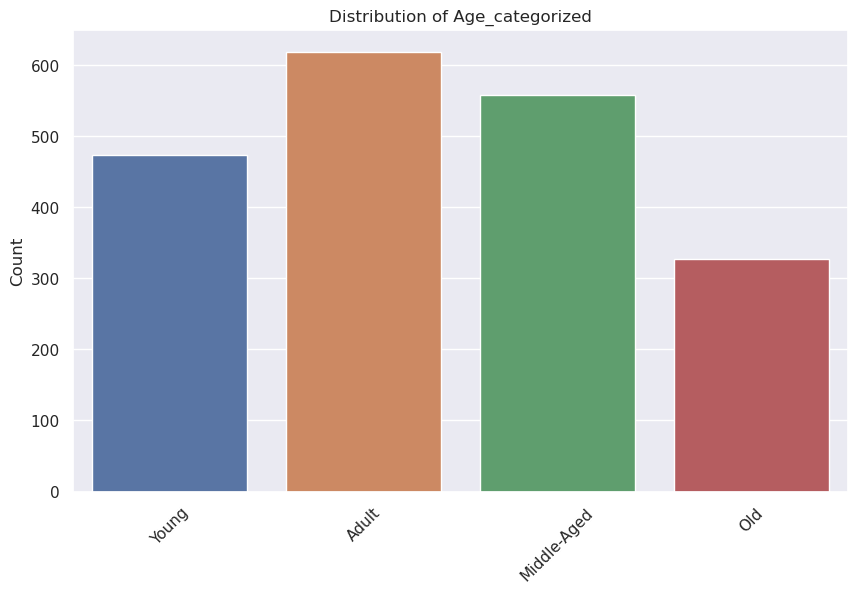

In [281]:
describe_categorical_col(df, 'Age_categorized')

<H1>Bivariate

In [1]:
#Add functions for Bivariate analysis